# RIT IMGS 211: Probability and Statistics for Imaging Scientists
### Created by Gabriel J. Diaz

![](https://www.rit.edu/brandportal/sites/rit.edu.brandportal/files/inline-images/new_RIT_full_RGB_hor_k_0.png?export=view&id=XXX)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# NEW TO THIS COURSE
import scipy.stats as stats

# 1- Binomial distributions

Below, I create a "frozen" distribution - in this case, a binomial distribution (but you can create many other types of frozen distributions)

In [20]:
n = 20
p = 0.3
red_delicious_dist = stats.binom(n, p)

In [21]:
type(red_delicious_dist)

scipy.stats._distn_infrastructure.rv_discrete_frozen

In [22]:
xVals = np.arange(0, 21)
xVals

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [23]:
y_probabilities = red_delicious_dist.pmf(xVals)
y_probabilities

array([7.97922663e-04, 6.83933711e-03, 2.78458725e-02, 7.16036722e-02,
       1.30420974e-01, 1.78863051e-01, 1.91638983e-01, 1.64261985e-01,
       1.14396740e-01, 6.53695655e-02, 3.08170809e-02, 1.20066549e-02,
       3.85928193e-03, 1.01783260e-03, 2.18106985e-04, 3.73897689e-05,
       5.00755833e-06, 5.04963865e-07, 3.60688475e-08, 1.62716605e-09,
       3.48678440e-11])

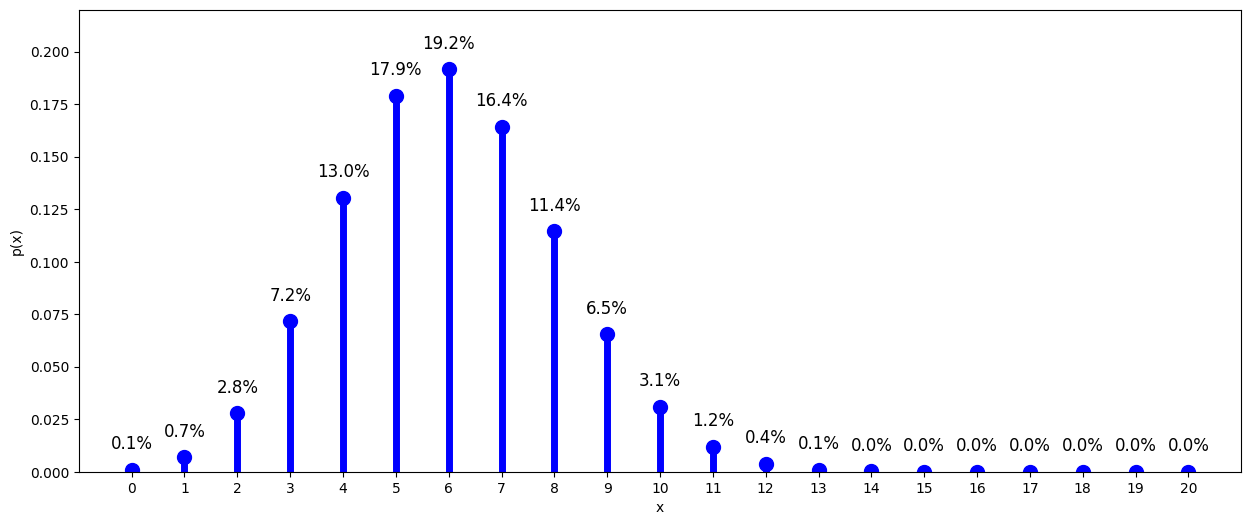

In [25]:
plt.figure(figsize=(15,6))

# Vertical lines
plt.vlines(xVals, 0, y_probabilities, colors='b', linestyles='-', lw=5,label='frozen pmf')
# Blue dots at their max value
plt.plot(xVals, y_probabilities, 'bo', ms=10, label='binom pmf')

[plt.text(xVals[i], y_probabilities[i]+.01, f'{100.0*y_probabilities[i]:.1f}%',size=12,ha='center') for i in xVals-1]

# The equivalent for loop
# for i in xVals-1:
#   plt.text(xVals[i], y_probabilities[i]+.01, f'{100.0*y_probabilities[i]:.1f}%',size=12,ha='center')


plt.xticks(xVals)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.ylim((0, .22))
plt.show()


In [26]:
pct = red_delicious_dist.pmf(8)*100
print(f'The probability of an image containing 8 red delicious apples is: {pct:.2f}%')

The probability of an image containing 8 red delicious apples is: 11.44%


In [27]:
x_vals = np.arange(8,21)
probs = red_delicious_dist.pmf(x_vals)
pct_8orMore = np.sum(probs) * 100

In [28]:
print(f'The probability of an image containing 8 OR MORE red delicious apples is: {pct_8orMore:.2f}%')

The probability of an image containing 8 OR MORE red delicious apples is: 22.77%




---


#2. The poisson distribution

### Given the parameters of a Poisson distribution, calculate a probability.

The function below, `poisson.pmf(k, lam)` accepts an integer k (e.g. a potential observation, the lambda paramter that described the poisson distribution, and returns a probability.

In [29]:
k = 25 #np.arange(0, 50, 1) # How many are aborbed? Simulate k from 0 to 100 in intervals of 0.1
lam = 20  # on average, 20 are absorbed over the interval

prob = stats.poisson.pmf(k, lam)

print(f'We know that 100 photons of a particular wavelength fall on a cone, {lam} are absorbed on average.')
print(f'According to a Poison distribution, this means there is a probability of {prob:.2f} that {k} will be absorbed.')
print(f'...or a {100 * prob:.2f} chance.')

We know that 100 photons of a particular wavelength fall on a cone, 20 are absorbed on average.
According to a Poison distribution, this means there is a probability of 0.04 that 25 will be absorbed.
...or a 4.46 chance.


### You can also do this for many values of k at a time.

In [30]:

list_of_k = np.arange(10, 20, 1) # How many are aborbed? Simulate k from 10 to 20 in intervals of 1
lam = 20  # on average, 20 are absorbed over the interval

list_of_probs = stats.poisson.pmf(list_of_k, lam)

for i, prob in enumerate(list_of_probs):
  print(f'Probability of {list_of_k[i]} occurances: {prob:.6f}')


Probability of 10 occurances: 0.005816
Probability of 11 occurances: 0.010575
Probability of 12 occurances: 0.017625
Probability of 13 occurances: 0.027116
Probability of 14 occurances: 0.038737
Probability of 15 occurances: 0.051649
Probability of 16 occurances: 0.064561
Probability of 17 occurances: 0.075954
Probability of 18 occurances: 0.084394
Probability of 19 occurances: 0.088835


### Plot k from 0 to 100

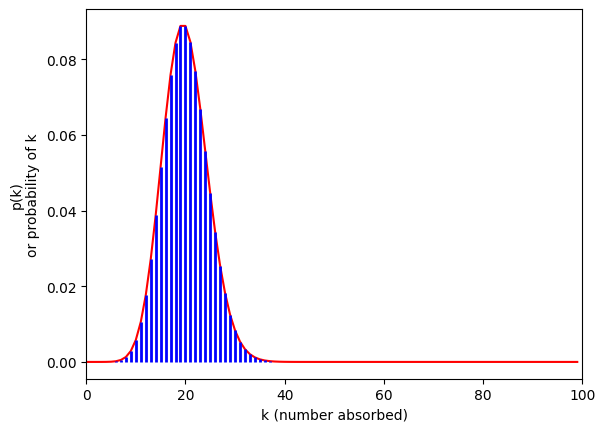

In [31]:
# Plot!

list_of_k = np.arange(0, 100, 1) # How many are aborbed? Simulate k from 10 to 20 in intervals of 1
lam = 20  # on average, 20 are absorbed over the interval

list_of_probs = stats.poisson.pmf(list_of_k, lam)

plt.plot(list_of_k, list_of_probs, 'r') # the red line
plt.vlines(list_of_k, 0, list_of_probs, colors='b', lw=2) # the blue vertical lines

plt.xlabel('k (number absorbed)')
plt.ylabel('p(k)\nor probability of k')
plt.xlim([0,100])
plt.show()

### Observe the way that the distribution changes as lambda changes

In this case, lambda is the number of photons typically absorbed

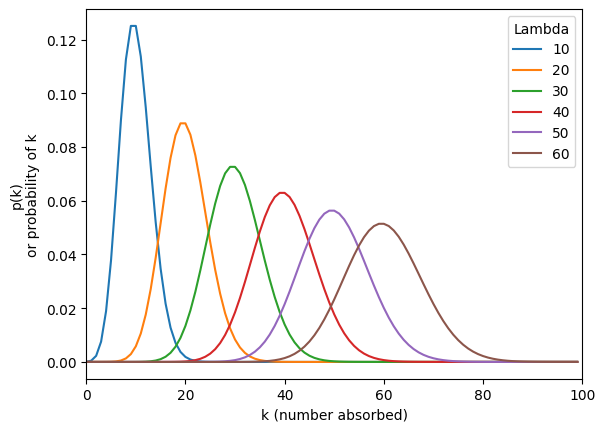

In [32]:
k = np.arange(0, 100, 1) # How many are aborbed? Simulate k from 0 to 100 in intervals of 0.1

for lam in np.arange(10,70,10): # on average, lam are absorbed over the interval

  h = list_of_probs = stats.poisson.pmf(k, lam)
  plt.plot(k, list_of_probs,label=lam) # the red line

plt.xlabel('k (number absorbed)')
plt.ylabel('p(k)\nor probability of k')
plt.legend(title="Lambda")
plt.xlim([0,100])
plt.show()